# Breast Cancer Classification
## **Dataset Description:**
#### Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

#### The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous). We ask you to complete the analysis of classifying these tumors using machine learning (with **SVMs**) and the Breast Cancer Wisconsin (Diagnostic) Dataset.

#### Dataset Link: **https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset**

<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQnjo50XZRwyzxm6PCF4tc7E-9S_wqdSKVm-Q&usqp=CAU' width=300>

# Import Libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from summarytools import dfSummary
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

# Read Breast Cancer Dataset

In [2]:
breast_cancer_df = pd.read_csv('breast-cancer.csv')
breast_cancer_df.drop(columns=['id'], inplace=True)
breast_cancer_df.sample(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
339,M,23.510,24.27,155.10,1747.0,0.10690,0.12830,0.23080,0.14100,0.1797,...,30.670,30.73,202.40,2906.0,0.1515,0.26780,0.4819,0.20890,0.2593,0.07738
175,B,8.671,14.45,54.42,227.2,0.09138,0.04276,0.00000,0.00000,0.1722,...,9.262,17.04,58.36,259.2,0.1162,0.07057,0.0000,0.00000,0.2592,0.07848
322,B,12.860,13.32,82.82,504.8,0.11340,0.08834,0.03800,0.03400,0.1543,...,14.040,21.08,92.80,599.5,0.1547,0.22310,0.1791,0.11550,0.2382,0.08553
123,B,14.500,10.89,94.28,640.7,0.11010,0.10990,0.08842,0.05778,0.1856,...,15.700,15.98,102.80,745.5,0.1313,0.17880,0.2560,0.12210,0.2889,0.08006
386,B,12.210,14.09,78.78,462.0,0.08108,0.07823,0.06839,0.02534,0.1646,...,13.130,19.29,87.65,529.9,0.1026,0.24310,0.3076,0.09140,0.2677,0.08824
474,B,10.880,15.62,70.41,358.9,0.10070,0.10690,0.05115,0.01571,0.1861,...,11.940,19.35,80.78,433.1,0.1332,0.38980,0.3365,0.07966,0.2581,0.10800
440,B,10.970,17.20,71.73,371.5,0.08915,0.11130,0.09457,0.03613,0.1489,...,12.360,26.87,90.14,476.4,0.1391,0.40820,0.4779,0.15550,0.2540,0.09532
93,B,13.450,18.30,86.60,555.1,0.10220,0.08165,0.03974,0.02780,0.1638,...,15.100,25.94,97.59,699.4,0.1339,0.17510,0.1381,0.07911,0.2678,0.06603
96,B,12.180,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,0.1900,...,12.830,20.92,82.14,495.2,0.1140,0.09358,0.0498,0.05882,0.2227,0.07376
518,B,12.880,18.22,84.45,493.1,0.12180,0.16610,0.04825,0.05303,0.1709,...,15.050,24.37,99.31,674.7,0.1456,0.29610,0.1246,0.10960,0.2582,0.08893


# Feature Engineering and EDA

In [3]:
X = breast_cancer_df.drop(columns=['diagnosis'])
y = breast_cancer_df['diagnosis']

## Show Description about the Dataset

In [4]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [5]:
dfSummary(breast_cancer_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,diagnosis[object],1. B2. M,357 (62.7%)212 (37.3%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABN0lEQVR4nO3bQWrDMBCF4VExodlIGIMP40P0sD2EbmOMtWhCNuqiZ8gb1fN/J5iEH0OCX+q9G6CQzOxuZjfvQ4J79d4f3ke827Qsy1fOefY+JLLW2pFS+r56cFPOed627VFKeXofE9F5np+11nnf95uZXTs2M7NSynNd1x/vYwK7ex+g8OF9AOIgNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBZjL7e4HP+5CoIn33U2vtqLXOFuQFvhG11g4ze3nf8W4MXsYQYvCSmPJBJdKTLcTTY2RhpnxR5nIjCzHlizSXG1mkKR+/tp3xpy5kiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskAkx5bv65/svwkz5oszlRsbgBTK/Cltq36Cso0UAAAAASUVORK5CYII="">",0(0.0%)
2,radius_mean[float64],Mean (sd) : 14.1 (3.5)min < med < max:7.0 < 13.4 < 28.1IQR (CV) : 4.1 (4.0),456 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACkElEQVR4nO3cvY7aQBRA4TuwrMyPbBAr6GhSUERKQUmTN8jDpk0XJHok2lR0SICNcJZgjFOwkbJRwsqDja/J+forpjgLa3s8JkkSAbSoFL0A4HcPRS/gb4wxdRF5tBw/JEnynOV6cDvqgjTG1Lvd7ifXdTs289vtdmOM+UyU5aQuSBF5dF23Mx6Pnz3P26cZDILAmU6nndVq9SgiBFlCGoMUERHP8/a9Xu+7xWg988XgZriogSoECVUIEqoQJFQhSKhCkFCFIKEKQUIVgoQqBAlVCBKqECRUIUioQpBQRe32M1txHNdExDXG2Iyz27xgdxVkGIa1KIo+DAaDarVaTbW5V4Td5hrcVZCHw+HBcZzGaDTa9/v9TZpZdpvrcFdB/tJsNtltXlJc1EAVgoQqBAlVCBKqECRUIUioQpBQhSChCkFCFYKEKgQJVQgSqhAkVMltt88VxzK7p9OplvV6UA65BHnNscxRFDlxHL/f7/dfRcRmCxlKLK9vSOtjmReLRWc+nzeOx2M1p7VBsVw36Nocy7zZbNgk+x/jogaqECRUIUioQpBQ5S7fOrTFIQPFI8gXHDKgA0G+uPaQgclk0lutVk/GmK3NxxPyGUH+weaQAb5ds0OQGeAIl+wQZIZsj3CJ49gVLqZEhCALx8/9awRZMH7uXyNIJTix7YwnNVCFIKEKQUKVi/9D8l4Mbu2fQfJeDIpw6RuS92Jwc2/e9uG9GNwS9yFL7t72cBJkiV372NH3/Z0x5ouIpJ6V8x2ak8WcyIU/hDeDDILASftpu93OEREJw9BZLpcNZvOZXa/XLcdxGsPh0LTb7R9pZn3fb81ms4+DweApbcxxHNfCMHzXarW+VSqVKM2syOXn7z8BUVNsousjDXsAAAAASUVORK5CYII="">",0(0.0%)
3,texture_mean[float64],Mean (sd) : 19.3 (4.3)min < med < max:9.7 < 18.8 < 39.3IQR (CV) : 5.6 (4.5),479 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACZUlEQVR4nO3csW7aUBiG4f+UEBmIDIgKNlaGSh0YWXoHvdiu3TqwI3EHbEiAQbhxAOMObdWmShPZ2Pgzep/9RGd4RXyO/NslSWKAindlbwD4213ZG3iJc65hZvcZlx+SJHnMcz+4HrkgnXONXq/32ff9bpb1u91u45z7QpTVJBekmd37vt+dTCaP7XY7SrNwu9160+m0u1qt7s2MICtIMUgzM2u321G/3/+eYWkj983gamSDzCqO47qZ+c65LMt5/izZTQUZhmH9eDx+HA6HtVqtlurfvRnPnwpuKsjD4XDneV5zPB5Hg8Fgk2Ytz58abirI31qtFs+fFcXFOKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQU9j7kBaOs/vl8rue9H1RDIUFeMsp6PB69OI4/RFH0zcyyvGSLCivqFzLzKOtisejO5/Pm6XSqFbQ3CCt0hCHLKOtmsyltjICJxfLd5ExNFkwsaiDIX5hY1ECQ/2BisVzcQ0IKQUIKQUIKQUIKQUIKQUIKQUIKQUIKQUIKQUIKQUIKQUIKQUIKQUIKQUIK70PmhPGHfBBkDhh/yA9B5oDxh/wQZI4Yf7gchxpIIUhIIUhIIUhI4VAjgDvMP14Nkk/qFY87zOf+GySf1LsO7jCfe+0Xkk/qXRF3mD+9+QxZtU/qodo4ZUMKp+yKu7UTOkFW2KUn9CAI9s65r2aWeq0VFPObQW63Wy/tH93v956ZWRiG3nK5bLK2mLXr9frB87zmaDRynU7nKc3aIAgeZrPZp+Fw+L6EmJ+SJHlx3Q8/KGio5hrz7gAAAABJRU5ErkJggg=="">",0(0.0%)
4,perimeter_mean[float64],Mean (sd) : 92.0 (24.3)min < med < max:43.8 < 86.2 < 188.5IQR (CV) : 28.9 (3.8),522 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACZklEQVR4nO3cz6raQBiH4W/0KPEPEbHozk2XhS5cehG92F5CBa/gbLtyJ4hETA3GmC56SntK68Exml/S99kPzuIlZobMuDzPDVDRKHsCwO+eyp7A3zjnOmbW9hx+zPP8UOR88DhyQTrnOqPR6FMYhkOf8bvdbuuc+0yU1SQXpJm1wzAczufzw2AwSK4ZGEVRsFwuh5vNpm1mBFlBikGamdlgMEjG4/E3j6GdwieDh2FRAykECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSkECSmyZ2p8ZVnWMrPQOecznCO0JatVkHEct9I0/TidTpvNZvOqE4tmHKFVUKsgj8fjUxAE3dlslkwmk+01YzlCq6FWQf7U6/U4QltRLGoghSAhhSAh5W7vkDfcYBaez+dW0fNBNdwlyFtuMEvTNMiy7EOSJF/MzG

<Axes: xlabel='radius_mean', ylabel='Count'>

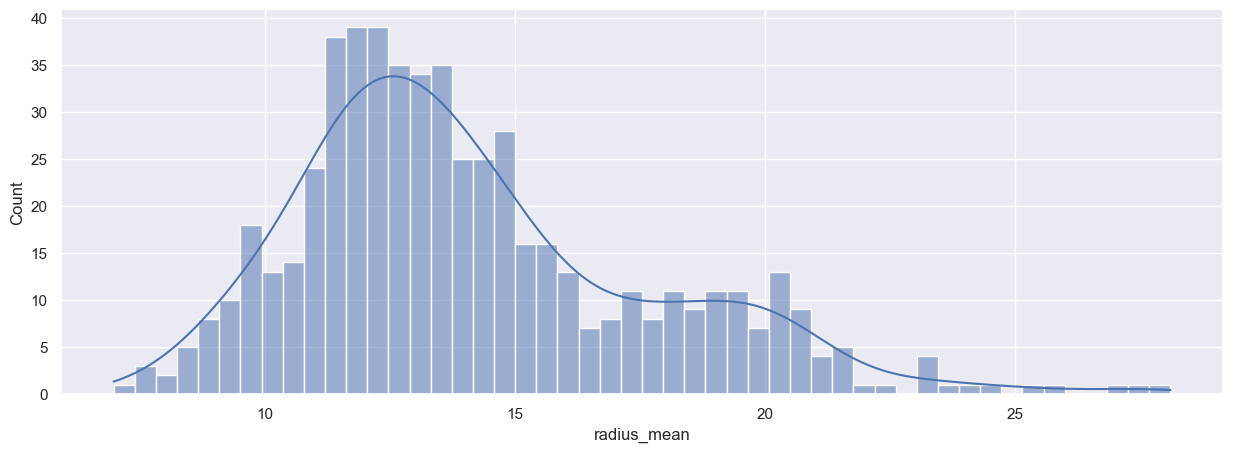

In [6]:
plt.figure(figsize=(15, 5))
sns.histplot(X.radius_mean, bins=50, kde=True)

<Axes: xlabel='texture_mean', ylabel='Count'>

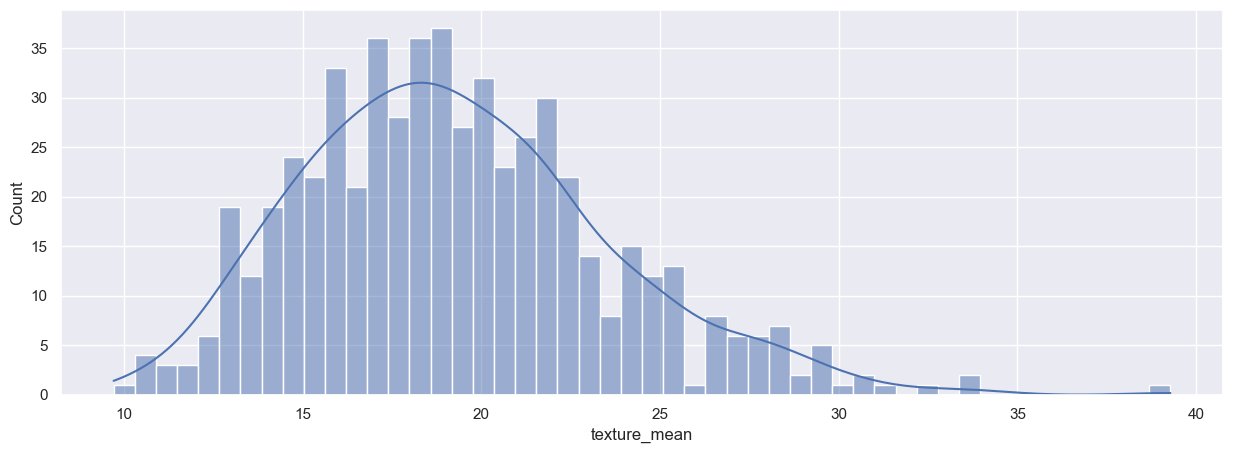

In [7]:
plt.figure(figsize=(15, 5))
sns.histplot(X.texture_mean, bins=50, kde=True)

<Axes: xlabel='perimeter_mean', ylabel='Count'>

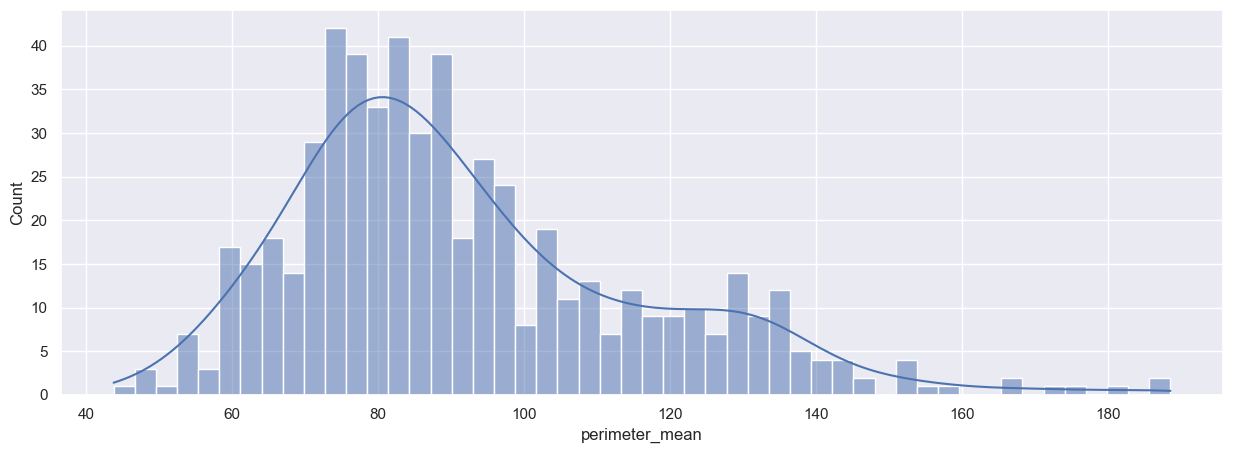

In [8]:
plt.figure(figsize=(15, 5))
sns.histplot(X.perimeter_mean, bins=50, kde=True)

<Axes: xlabel='area_mean', ylabel='Count'>

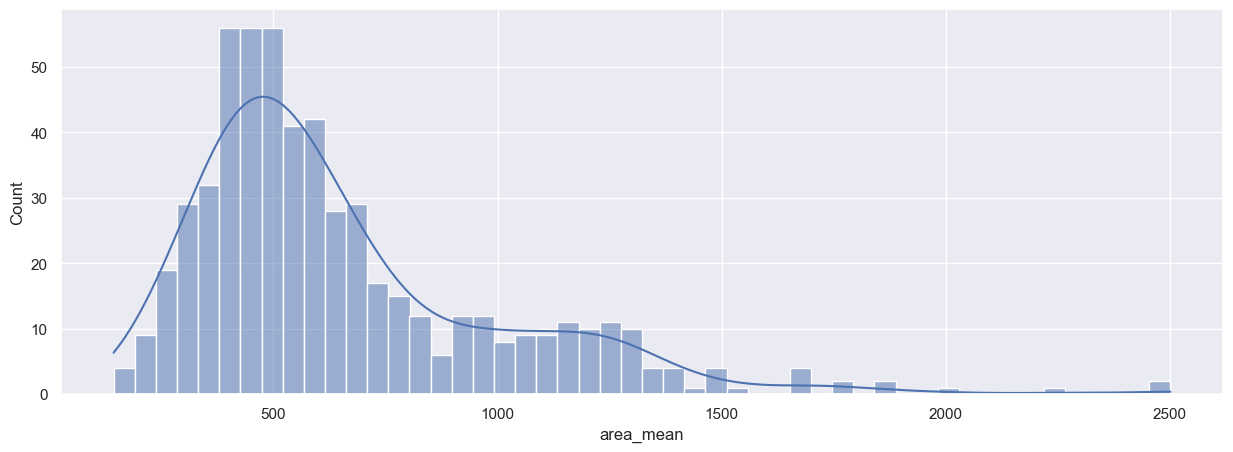

In [9]:
plt.figure(figsize=(15, 5))
sns.histplot(X.area_mean, bins=50, kde=True)

<Axes: xlabel='smoothness_mean', ylabel='Count'>

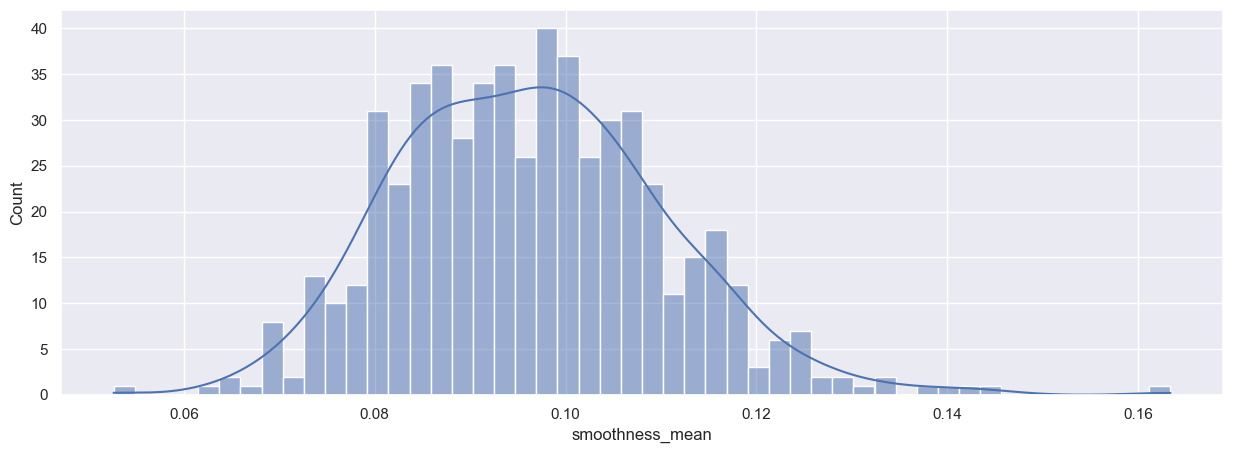

In [10]:
plt.figure(figsize=(15, 5))
sns.histplot(X.smoothness_mean, bins=50, kde=True)

<Axes: xlabel='compactness_mean', ylabel='Count'>

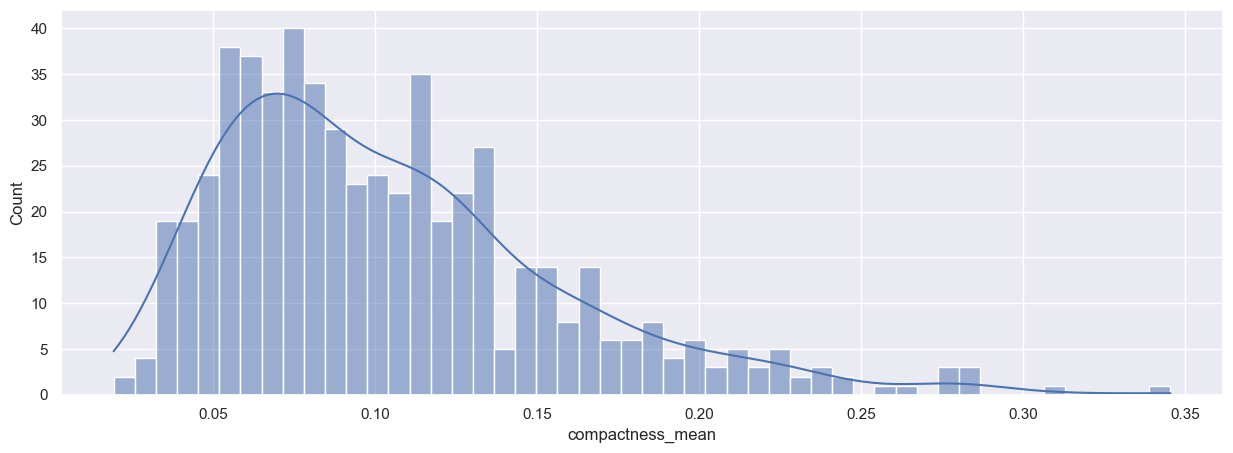

In [11]:
plt.figure(figsize=(15, 5))
sns.histplot(X.compactness_mean, bins=50, kde=True)

<Axes: xlabel='concavity_mean', ylabel='Count'>

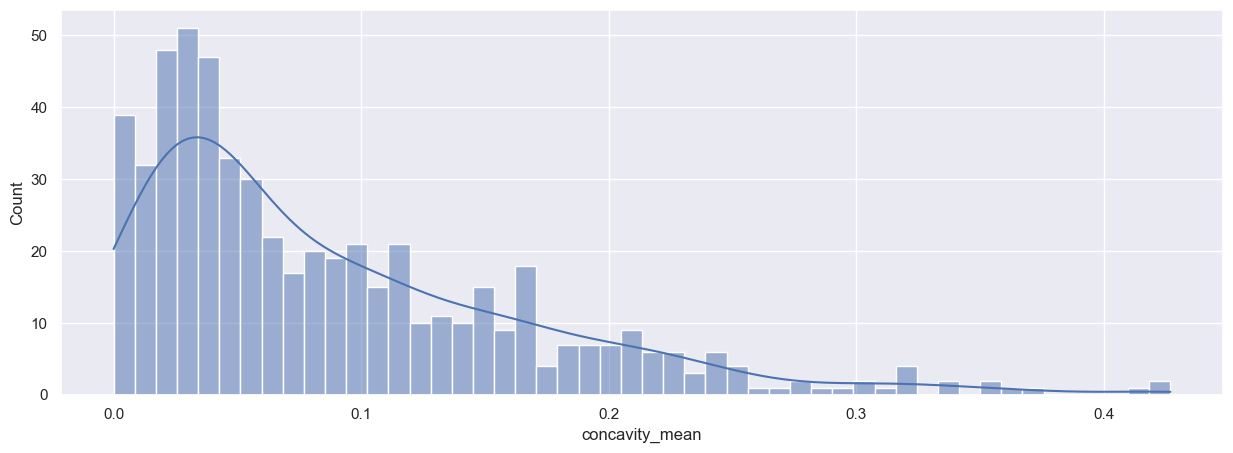

In [12]:
plt.figure(figsize=(15, 5))
sns.histplot(X.concavity_mean, bins=50, kde=True)

<Axes: xlabel='concave points_mean', ylabel='Count'>

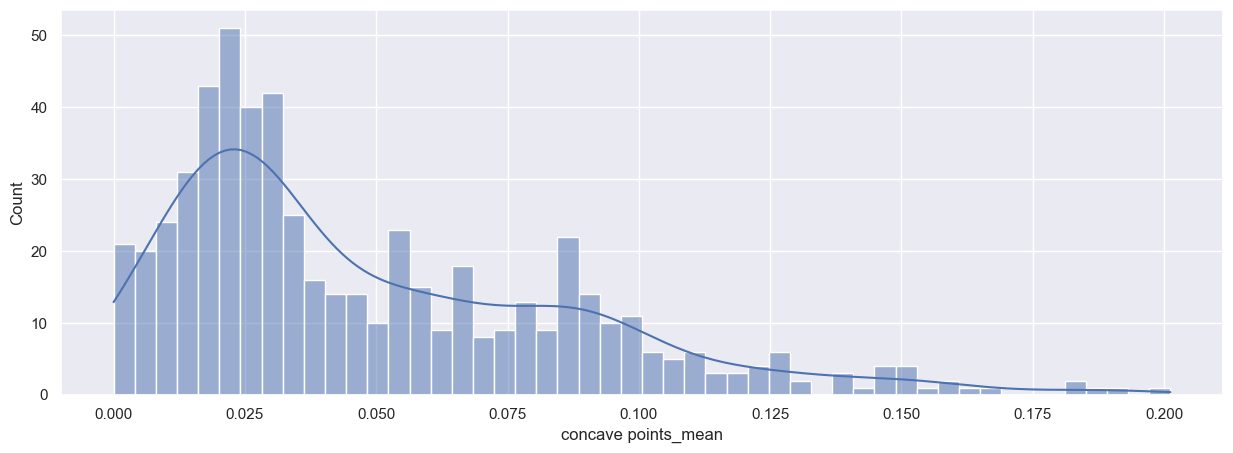

In [13]:
plt.figure(figsize=(15, 5))
sns.histplot(X['concave points_mean'], bins=50, kde=True)

<Axes: xlabel='symmetry_mean', ylabel='Count'>

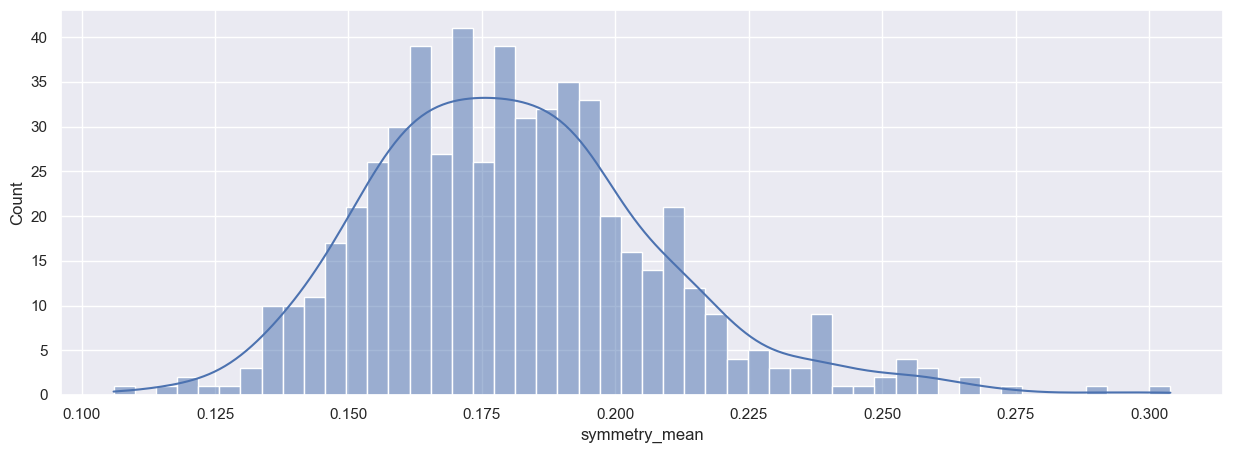

In [14]:
plt.figure(figsize=(15, 5))
sns.histplot(X.symmetry_mean, bins=50, kde=True)

<Axes: xlabel='fractal_dimension_mean', ylabel='Count'>

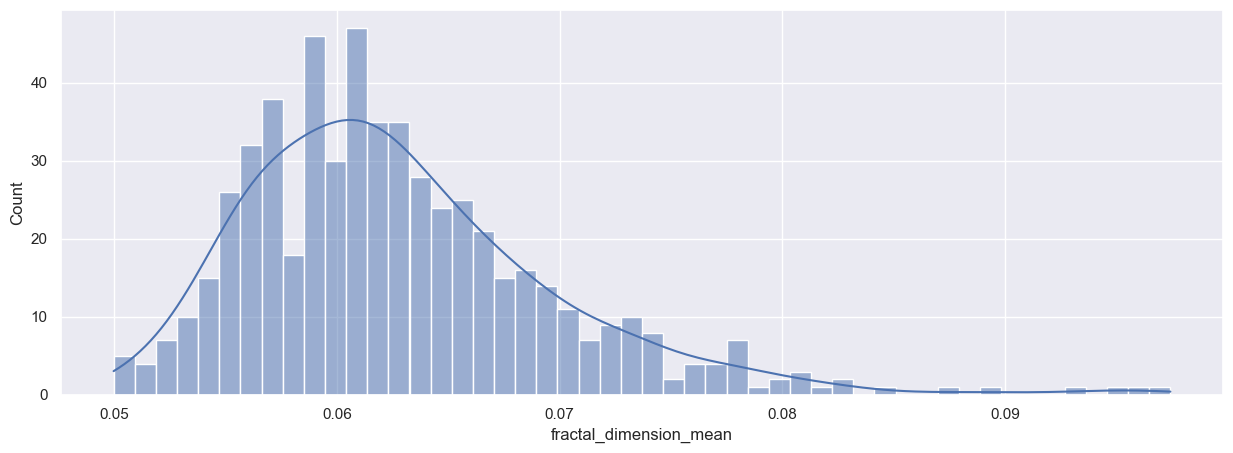

In [15]:
plt.figure(figsize=(15, 5))
sns.histplot(X.fractal_dimension_mean, bins=50, kde=True)

<Axes: xlabel='radius_se', ylabel='Count'>

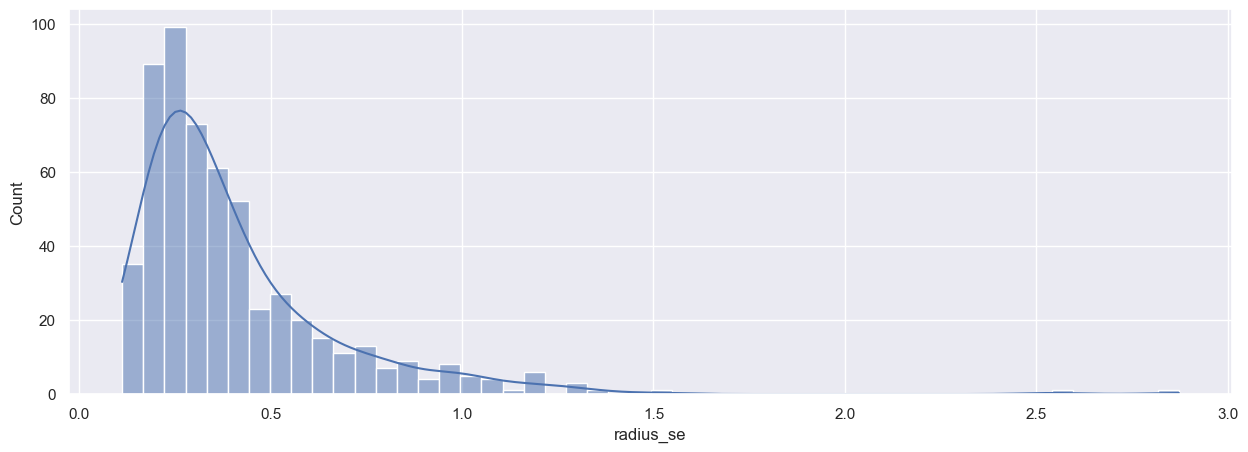

In [16]:
plt.figure(figsize=(15, 5))
sns.histplot(X.radius_se, bins=50, kde=True)

<Axes: xlabel='texture_se', ylabel='Count'>

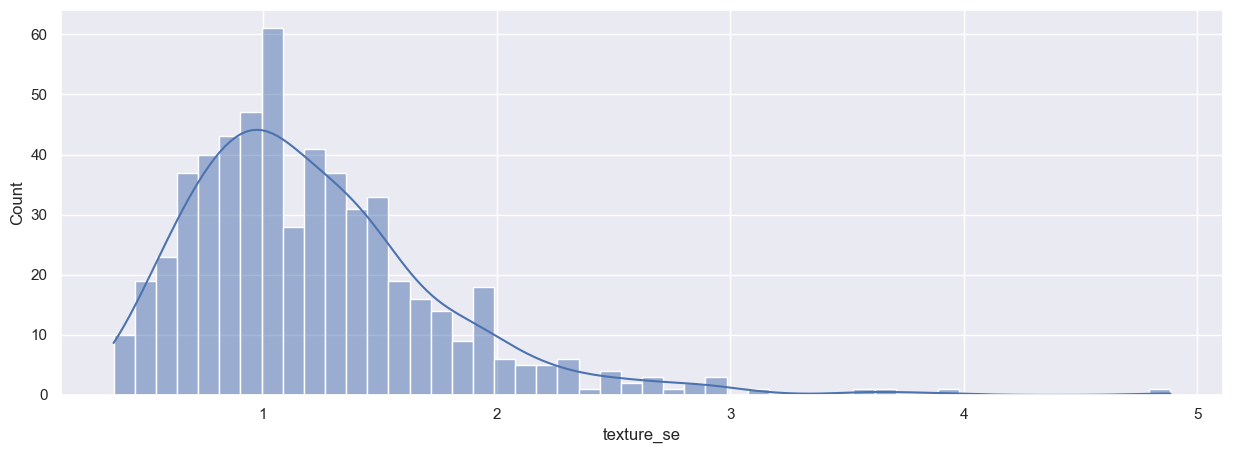

In [17]:
plt.figure(figsize=(15, 5))
sns.histplot(X.texture_se, bins=50, kde=True)

<Axes: xlabel='perimeter_se', ylabel='Count'>

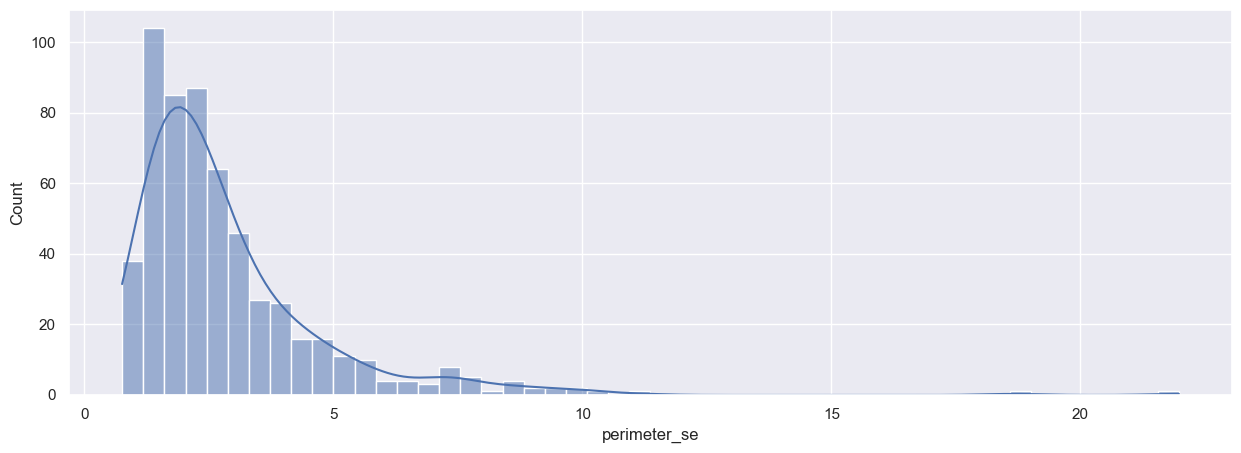

In [18]:
plt.figure(figsize=(15, 5))
sns.histplot(X.perimeter_se, bins=50, kde=True)

<Axes: xlabel='area_se', ylabel='Count'>

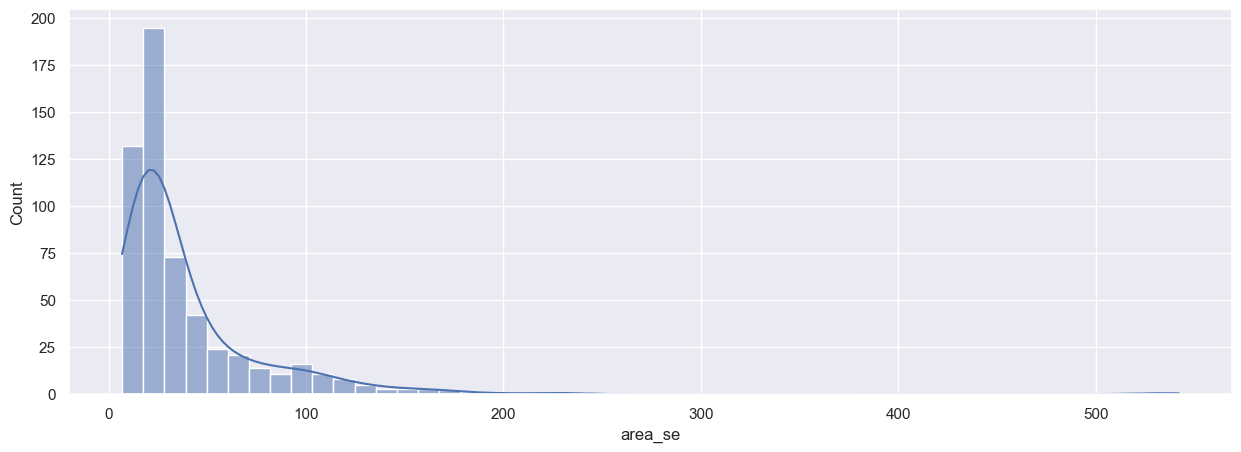

In [19]:
plt.figure(figsize=(15, 5))
sns.histplot(X.area_se, bins=50, kde=True)

<Axes: xlabel='smoothness_se', ylabel='Count'>

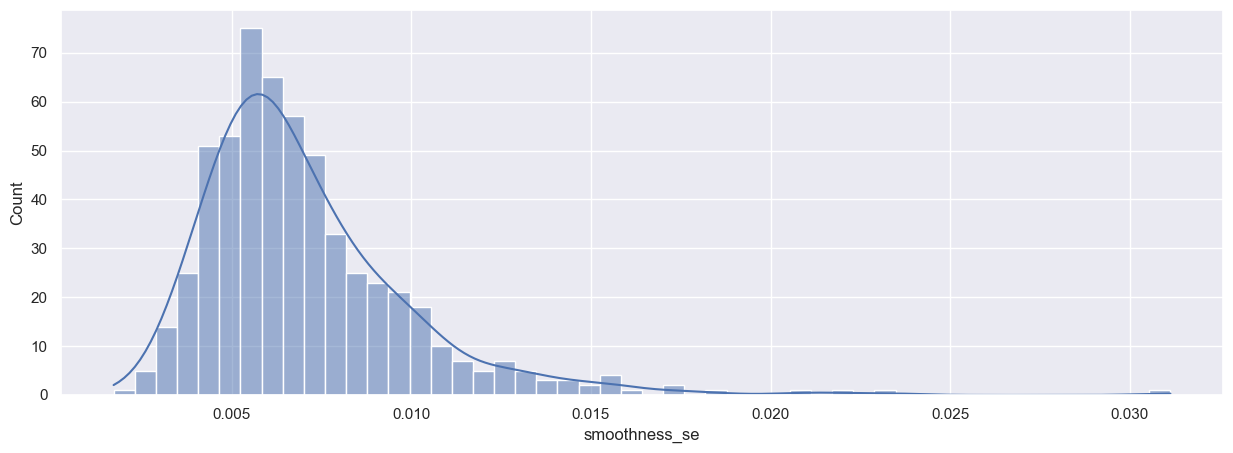

In [20]:
plt.figure(figsize=(15, 5))
sns.histplot(X.smoothness_se, bins=50, kde=True)

<Axes: xlabel='compactness_se', ylabel='Count'>

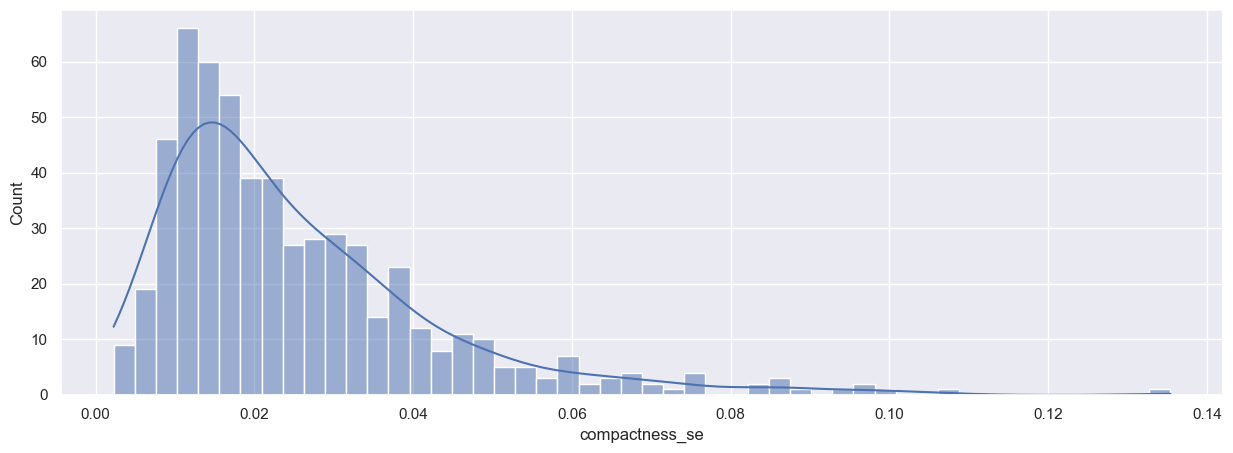

In [21]:
plt.figure(figsize=(15, 5))
sns.histplot(X.compactness_se, bins=50, kde=True)

<Axes: xlabel='concavity_se', ylabel='Count'>

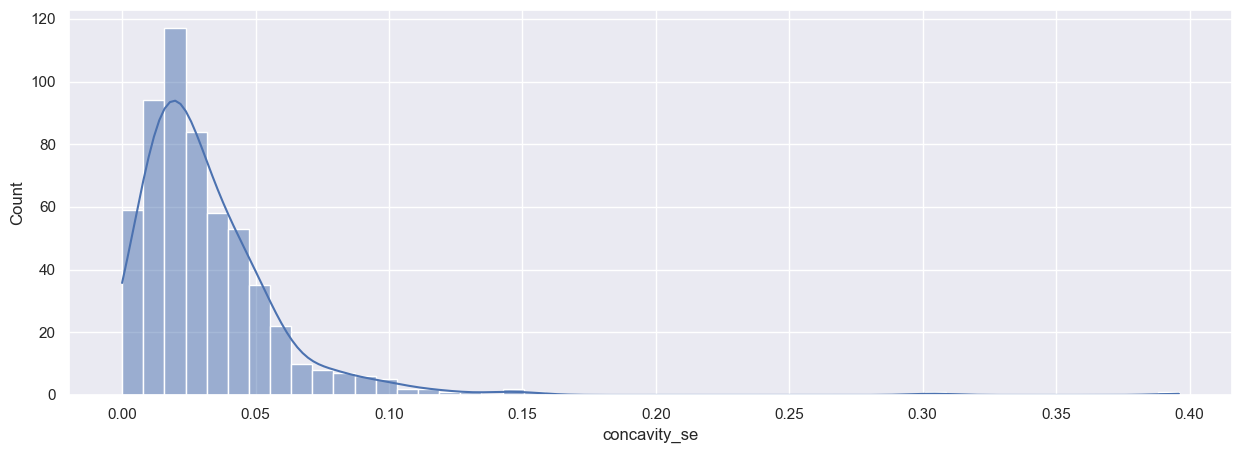

In [22]:
plt.figure(figsize=(15, 5))
sns.histplot(X.concavity_se, bins=50, kde=True)

<Axes: xlabel='concave points_se', ylabel='Count'>

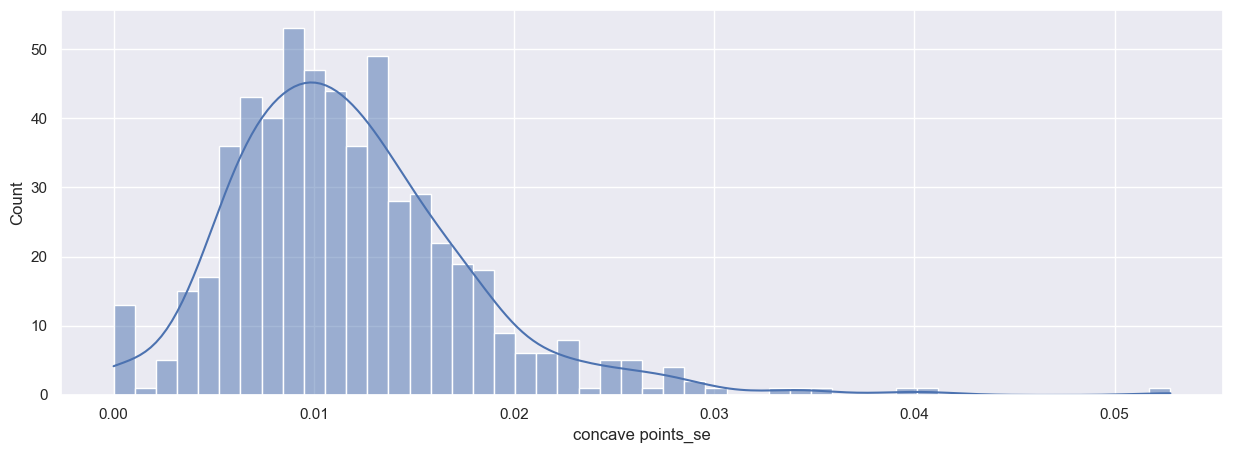

In [23]:
plt.figure(figsize=(15, 5))
sns.histplot(X['concave points_se'], bins=50, kde=True)

<Axes: xlabel='symmetry_se', ylabel='Count'>

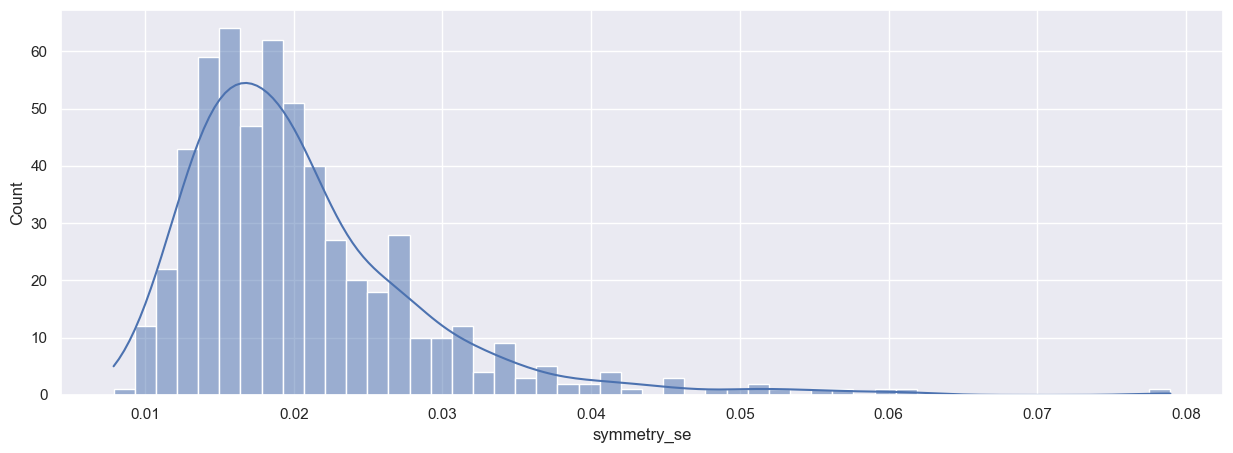

In [24]:
plt.figure(figsize=(15, 5))
sns.histplot(X.symmetry_se, bins=50, kde=True)

<Axes: xlabel='fractal_dimension_se', ylabel='Count'>

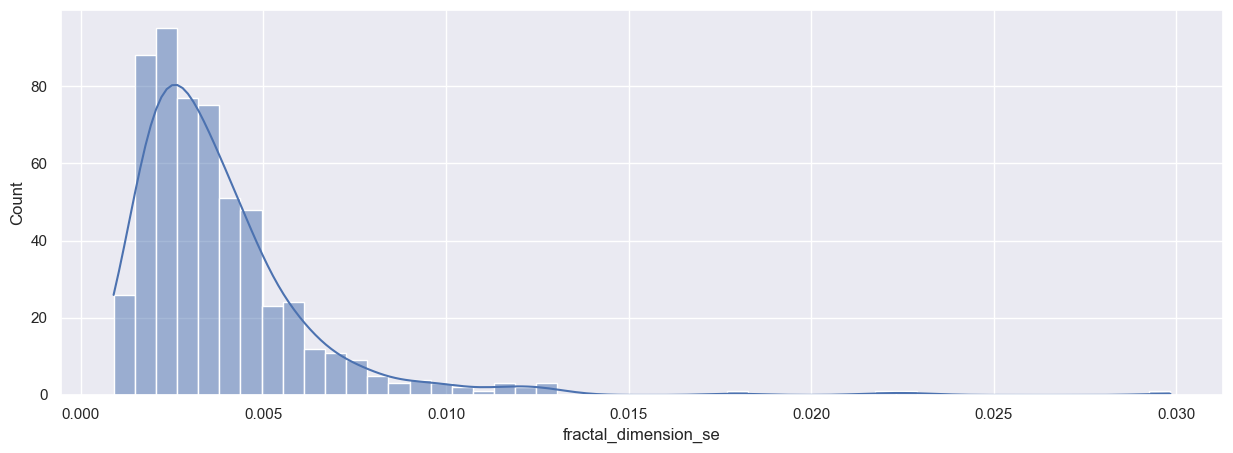

In [25]:
plt.figure(figsize=(15, 5))
sns.histplot(X.fractal_dimension_se, bins=50, kde=True)

<Axes: xlabel='radius_worst', ylabel='Count'>

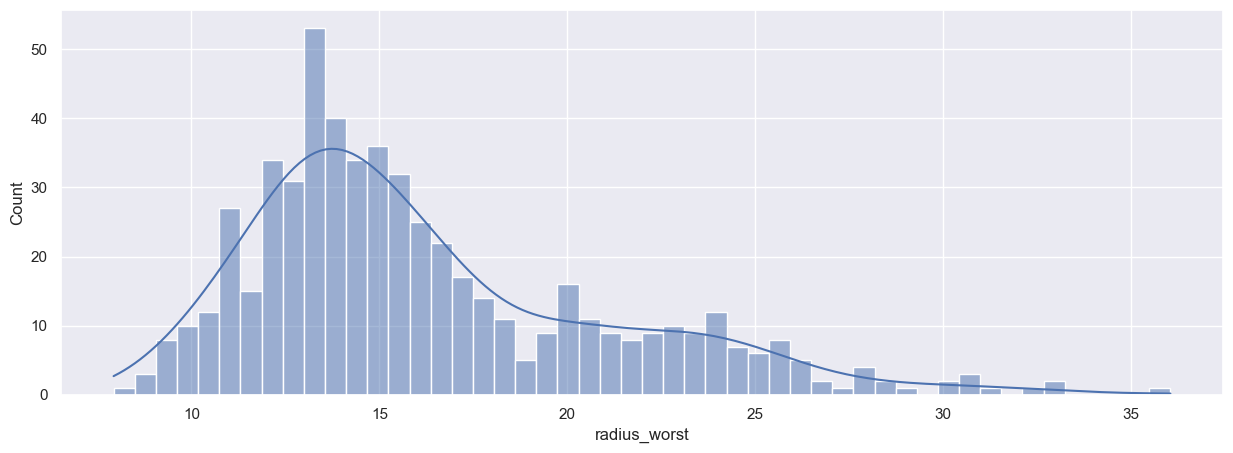

In [26]:
plt.figure(figsize=(15, 5))
sns.histplot(X.radius_worst, bins=50, kde=True)

<Axes: xlabel='texture_worst', ylabel='Count'>

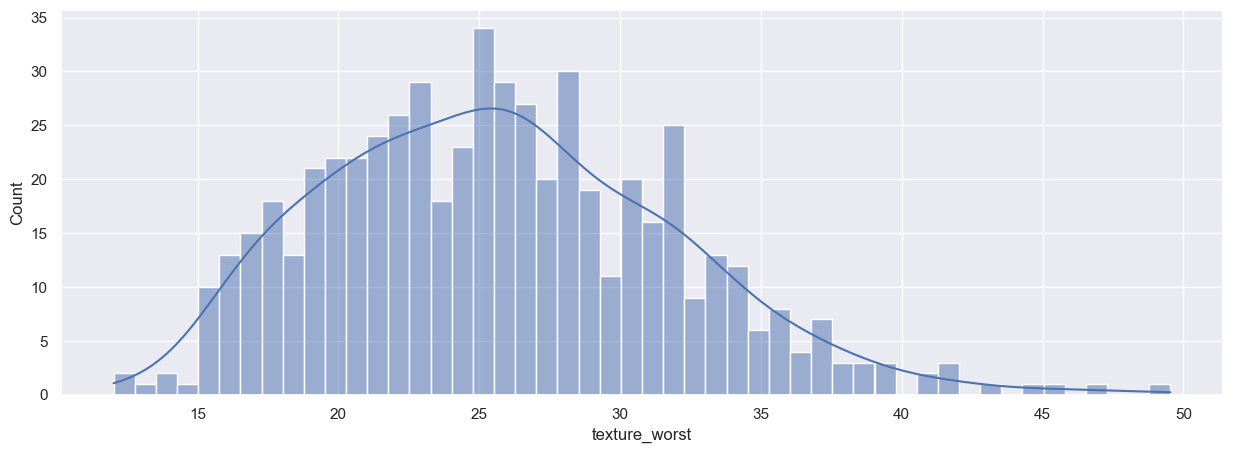

In [27]:
plt.figure(figsize=(15, 5))
sns.histplot(X.texture_worst, bins=50, kde=True)

<Axes: xlabel='perimeter_worst', ylabel='Count'>

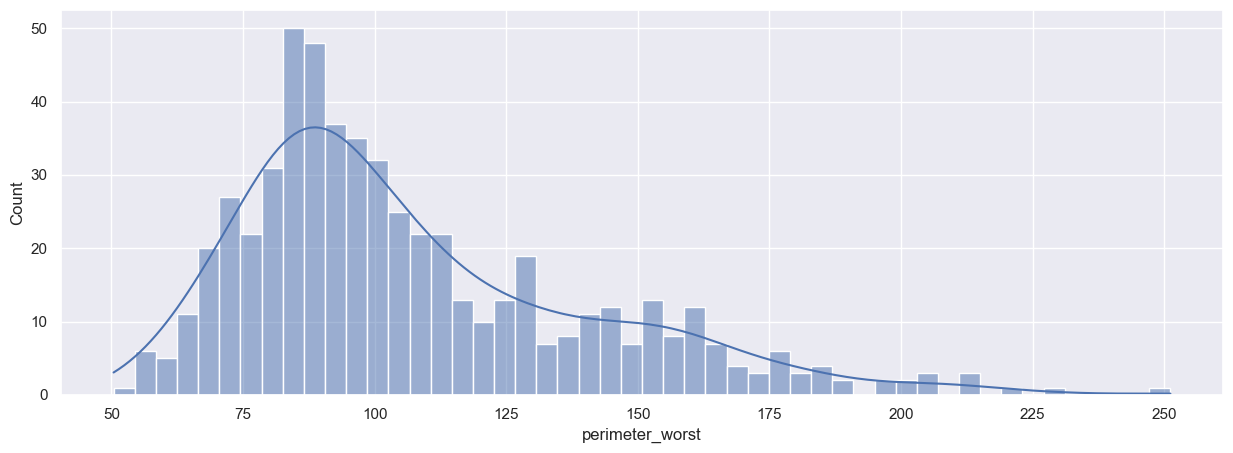

In [28]:
plt.figure(figsize=(15, 5))
sns.histplot(X.perimeter_worst, bins=50, kde=True)

<Axes: xlabel='area_worst', ylabel='Count'>

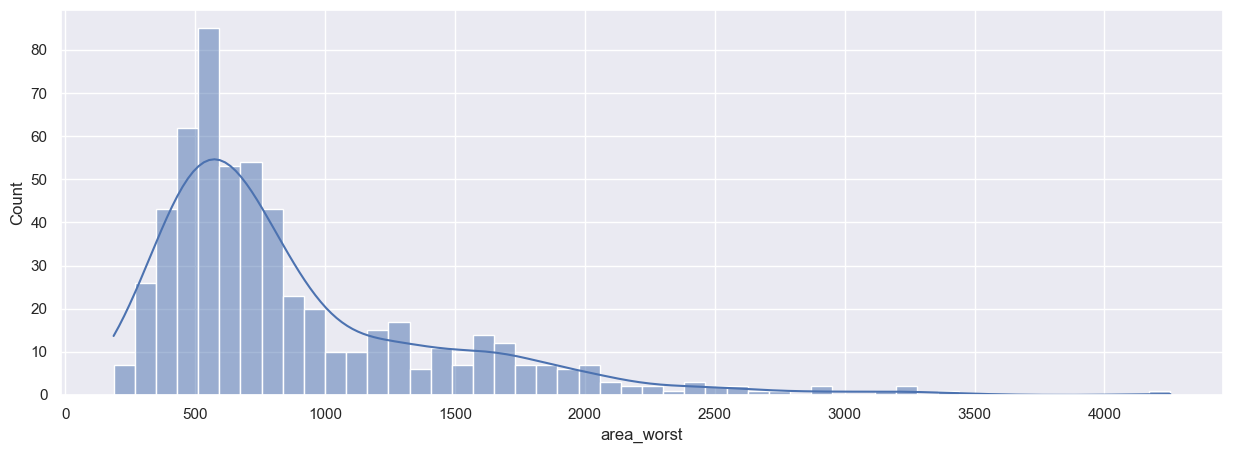

In [29]:
plt.figure(figsize=(15, 5))
sns.histplot(X.area_worst, bins=50, kde=True)

<Axes: xlabel='smoothness_worst', ylabel='Count'>

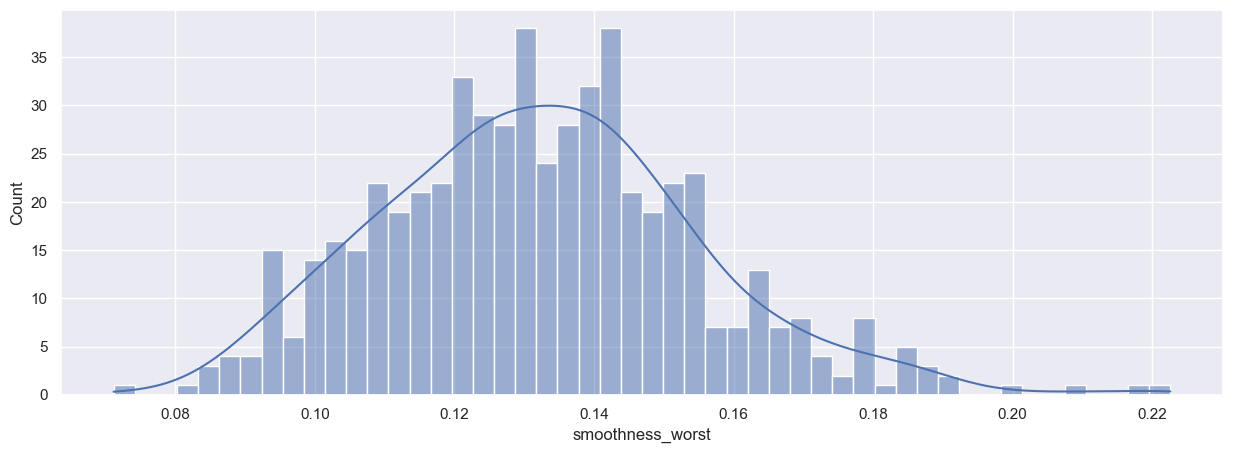

In [30]:
plt.figure(figsize=(15, 5))
sns.histplot(X.smoothness_worst, bins=50, kde=True)

<Axes: xlabel='compactness_worst', ylabel='Count'>

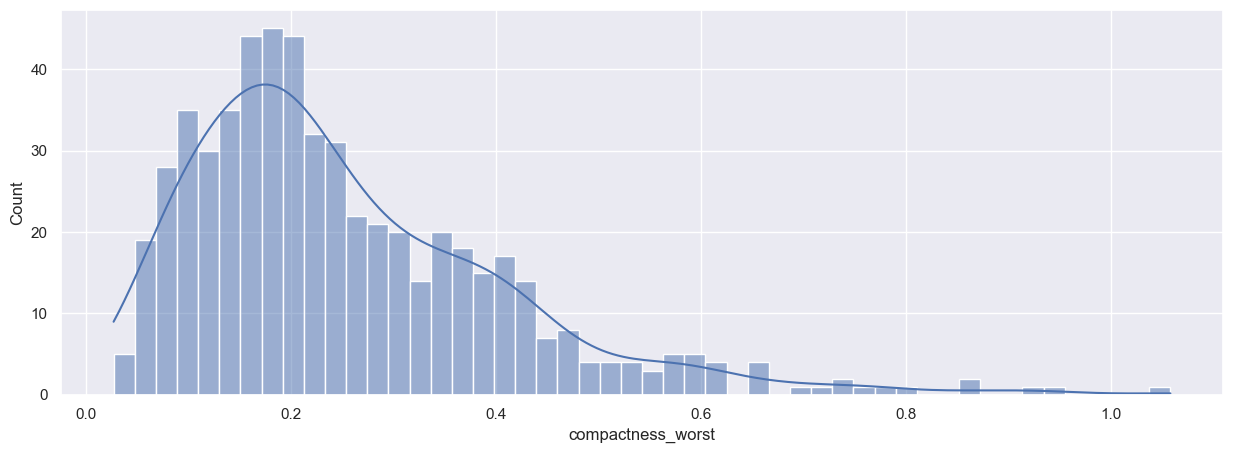

In [31]:
plt.figure(figsize=(15, 5))
sns.histplot(X.compactness_worst, bins=50, kde=True)

<Axes: xlabel='concavity_worst', ylabel='Count'>

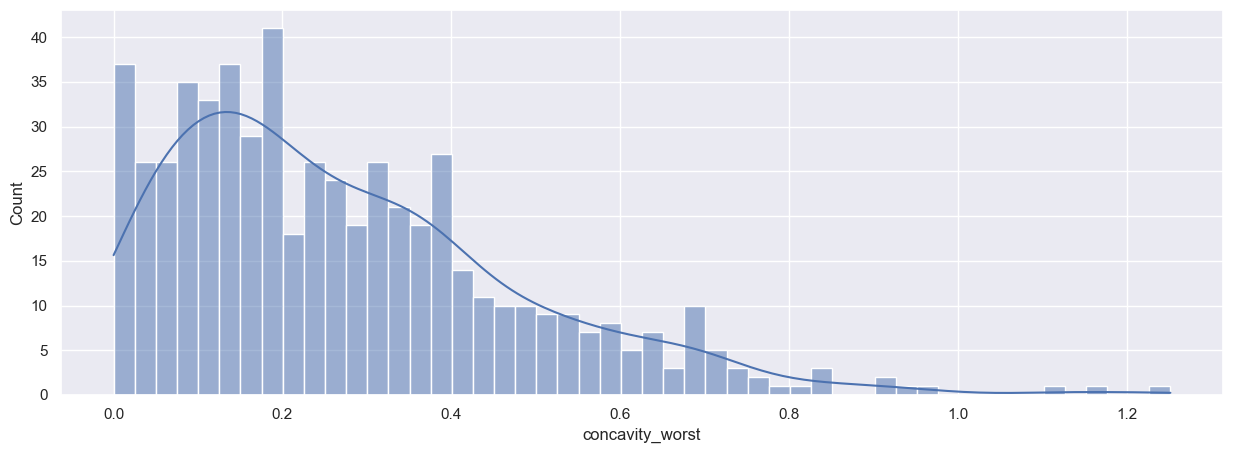

In [32]:
plt.figure(figsize=(15, 5))
sns.histplot(X.concavity_worst, bins=50, kde=True)

<Axes: xlabel='concave points_worst', ylabel='Count'>

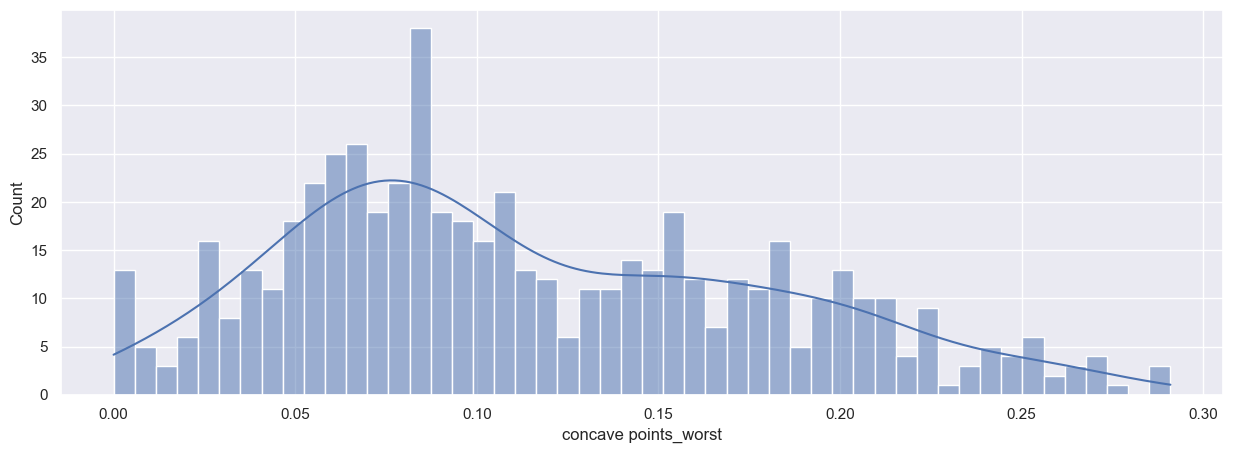

In [33]:
plt.figure(figsize=(15, 5))
sns.histplot(X['concave points_worst'], bins=50, kde=True)

<Axes: xlabel='symmetry_worst', ylabel='Count'>

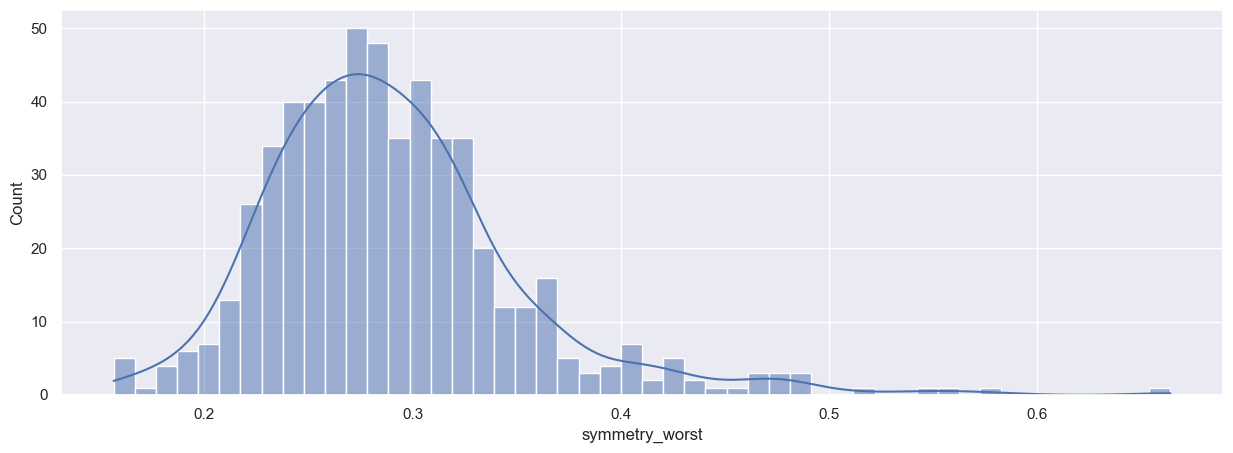

In [34]:
plt.figure(figsize=(15, 5))
sns.histplot(X.symmetry_worst, bins=50, kde=True)

<Axes: xlabel='fractal_dimension_worst', ylabel='Count'>

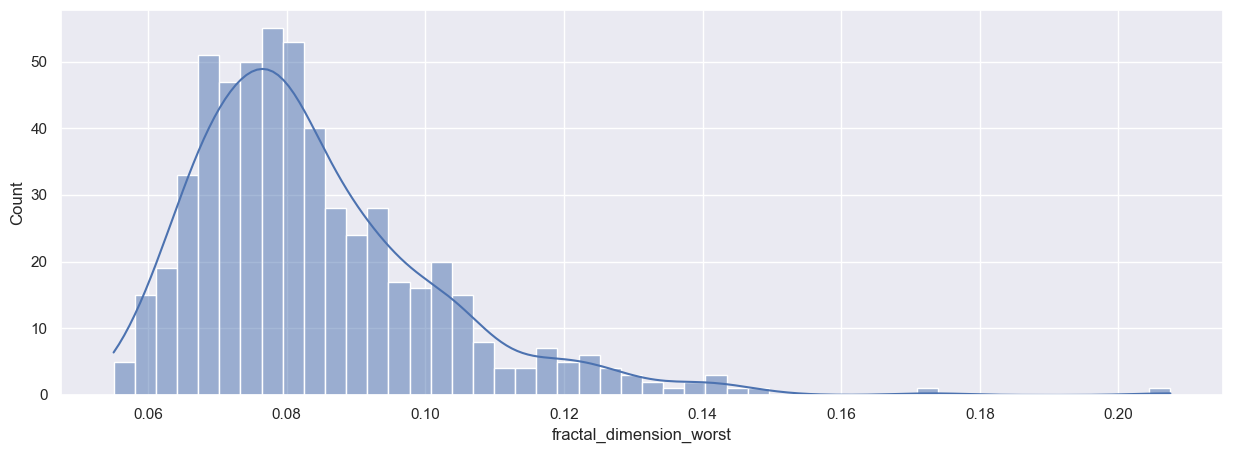

In [35]:
plt.figure(figsize=(15, 5))
sns.histplot(X.fractal_dimension_worst, bins=50, kde=True)

<Axes: >

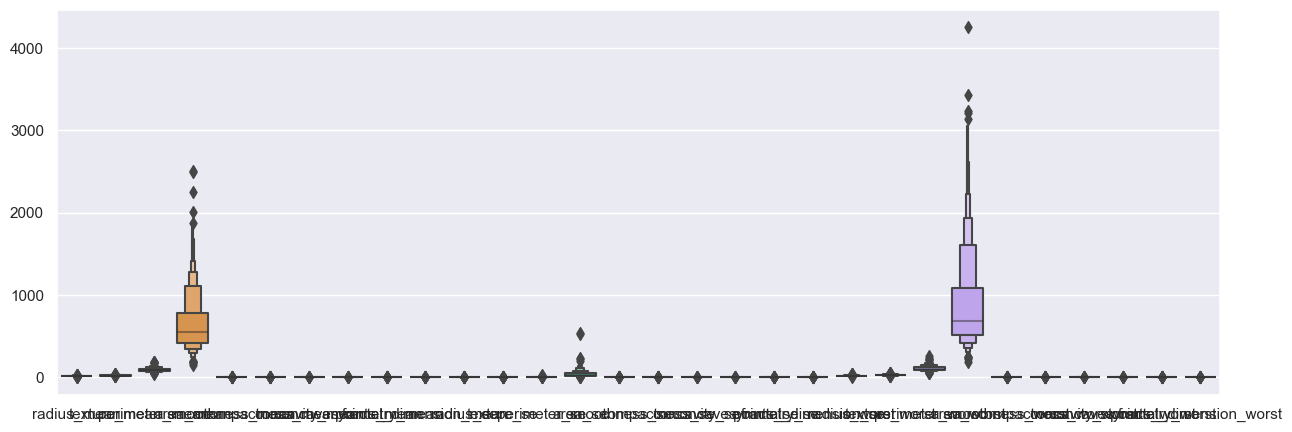

In [36]:
plt.figure(figsize=(15, 5))
sns.boxenplot(X)

## Plot The Destripution of The Dataset

In [56]:
pca = PCA(n_components=2, random_state=42)
decomposition_features = pca.fit_transform(X)

In [57]:
feature_1 = decomposition_features[:, 0]
feature_2 = decomposition_features[:, 1]

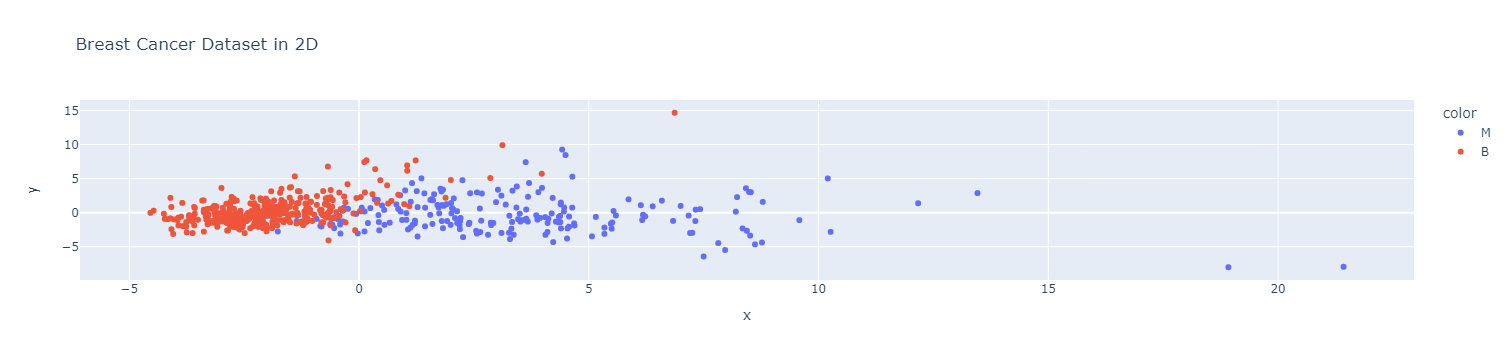

In [64]:
px.scatter(
    x=feature_1,
    y=feature_2,
    color=breast_cancer_df['diagnosis'],
    title='Breast Cancer Dataset in 2D'
)

<Figure size 1500x800 with 0 Axes>

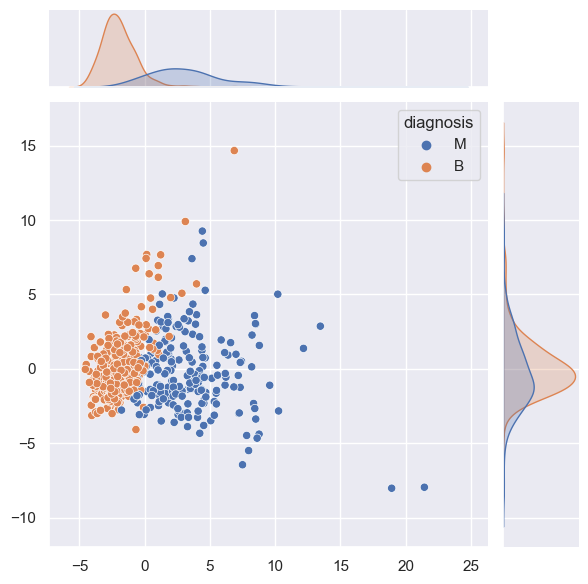

In [65]:
plt.figure(figsize=(15, 8))
sns.jointplot(
    x=feature_1,
    y=feature_2,
    hue=breast_cancer_df['diagnosis']
)

## Check Data Balanced Or Not?

<Axes: ylabel='diagnosis'>

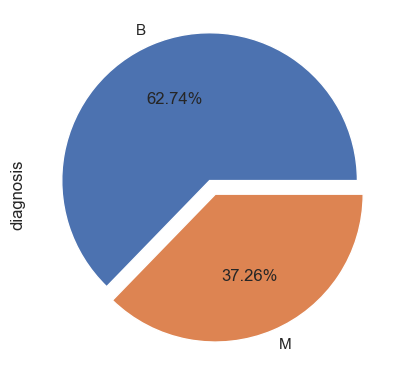

In [41]:
y.value_counts(normalize=True).plot.pie(explode=[0.1, 0], autopct='%1.2f%%')

## Scale data using Robust Scaler

In [42]:
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)

In [43]:
X

array([[ 1.13235294, -1.5026643 ,  1.26374006, ...,  1.71524826,
         2.63555556,  1.88457808],
       [ 1.76470588, -0.19005329,  1.61285862, ...,  0.89219446,
        -0.10666667,  0.43549952],
       [ 1.54901961,  0.42806394,  1.51261666, ...,  1.48305173,
         1.17185185,  0.3656644 ],
       ...,
       [ 0.79166667,  1.64120782,  0.76253025, ...,  0.43402094,
        -0.89481481, -0.08923375],
       [ 1.77205882,  1.86323268,  1.86173522, ...,  1.7111019 ,
         1.87407407,  2.13191077],
       [-1.375     ,  1.01243339, -1.32457656, ..., -1.03586607,
         0.07259259, -0.46799224]])

## Split dataset into 80% Training and % Testing

### Use Label Encodwer to encode our Target

In [44]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

### Split Data

In [45]:
x_train, x_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=0,
    shuffle=True,
    test_size=0.2,
    stratify=y,
)

# SVM Model

In [46]:
svc = SVC(random_state=0)
svc.fit(x_train, y_train)

SVC(random_state=0)

In [47]:
svc_y_predict = svc.predict(x_test)

In [48]:
print(metrics.classification_report(y_test, svc_y_predict)) 

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        72
           1       0.95      0.95      0.95        42

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



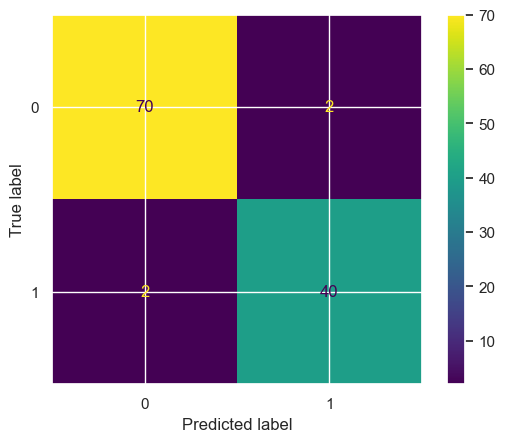

In [49]:
metrics.ConfusionMatrixDisplay.from_estimator(svc, x_test, y_test)

In [50]:
round(
    metrics.accuracy_score(y_true=y_test, y_pred=svc_y_predict) * 100,
    4
)

96.4912

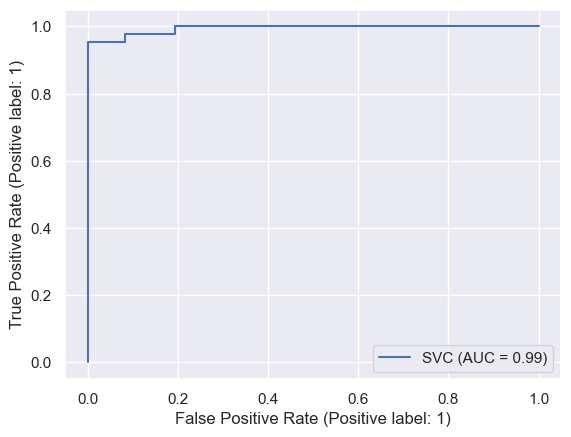

In [51]:
metrics.RocCurveDisplay.from_estimator(
    svc,
    x_test,
    y_test
)

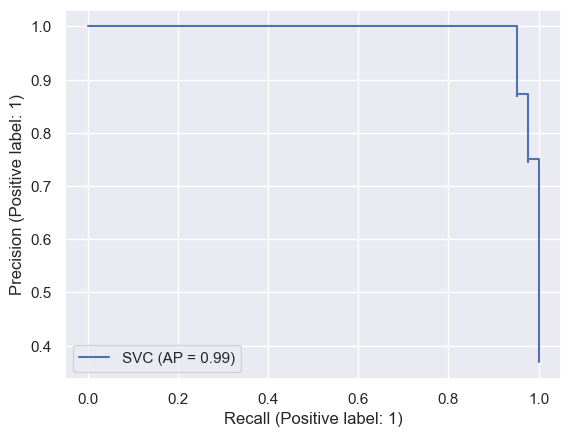

In [52]:
metrics.PrecisionRecallDisplay.from_estimator(
    svc,
    x_test,
    y_test
)

In [53]:
metrics.precision_score(y_test, svc_y_predict).round(3)

0.952

In [54]:
metrics.recall_score(y_test, svc_y_predict).round(3)

0.952

In [55]:
metrics.f1_score(y_test, svc_y_predict).round(2)

0.95

## Tune SVC Model

In [61]:
parameters = {'kernel' : ('linear', 'rbf'), 'C' : range(1, 11)}

In [62]:
clf = GridSearchCV(svc, parameters)

In [63]:
clf.fit(x_train, y_train)

GridSearchCV(estimator=SVC(random_state=0),
             param_grid={'C': range(1, 11), 'kernel': ('linear', 'rbf')})

In [66]:
clf.best_params_

{'C': 2, 'kernel': 'rbf'}

In [73]:
clf.cv_results_

{'mean_fit_time': array([0.00199876, 0.00279984, 0.00220189, 0.00260072, 0.00270233,
        0.00199804, 0.00240088, 0.00259943, 0.00239902, 0.00240197,
        0.00230212, 0.00180001, 0.0022018 , 0.00199857, 0.00259705,
        0.00220032, 0.00229998, 0.00219846, 0.00259604, 0.00199785]),
 'std_fit_time': array([3.25369303e-06, 3.99882606e-04, 7.47923219e-04, 4.89341606e-04,
        4.00591961e-04, 1.26698782e-06, 4.88715565e-04, 4.88873850e-04,
        4.90330943e-04, 4.88794595e-04, 4.02890729e-04, 4.01617081e-04,
        7.42855930e-04, 6.28207568e-04, 4.90154259e-04, 4.02361495e-04,
        5.98838056e-04, 3.99472645e-04, 1.01681300e-03, 3.84320100e-06]),
 'mean_score_time': array([0.00080199, 0.00099945, 0.00040011, 0.00119963, 0.00080228,
        0.00120053, 0.00079975, 0.00120034, 0.00080075, 0.00119934,
        0.00060043, 0.00099735, 0.00059805, 0.00100193, 0.00040164,
        0.00099993, 0.00080223, 0.0008029 , 0.00080075, 0.00059943]),
 'std_score_time': array([4.01007928e-

In [67]:
best_svc = SVC(kernel='rbf', C=2)
best_svc.fit(x_train, y_train)

SVC(C=2)

In [68]:
y_pred = best_svc.predict(x_test)

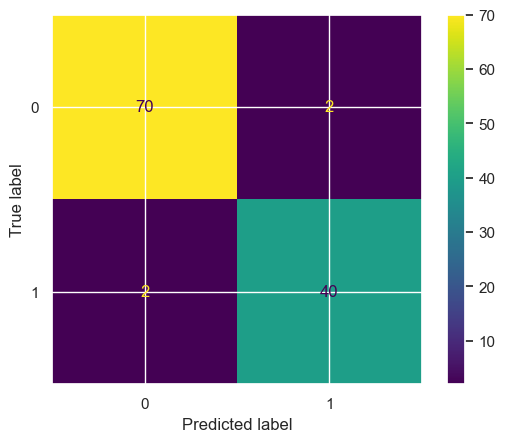

In [69]:
metrics.ConfusionMatrixDisplay.from_estimator(best_svc, x_test, y_test)

In [70]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        72
           1       0.95      0.95      0.95        42

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [71]:
metrics.accuracy_score(y_test, y_pred).round(3)

0.965